<a href="https://colab.research.google.com/github/roadrollerdafjorst/Language-Identification-System/blob/main/Language_Identification_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Language Identification System using Gaussian Mixture Model

Drive link for all files used in the assignment: https://drive.google.com/drive/folders/1v9P3CmD2uxNZFDLFhQK70RpStTpvy7rO?usp=sharing<br>
X_train.csv, X_testyt.csv, X_testpb.csv: data extracted from given audio data<br>
X_train_smol.csv, X_testyt_smol.csv, X_testpb_smol.csv: subsets for og data<br>
LID.ipynb: notebook used to build models on local system using entire dataset<br>
GM models: models built on entire dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
X_train = pd.read_csv('X_train_smol.csv')
X_train.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,0,1,2,3,4,5,6,...,31,32,33,34,35,36,37,38,39,[.ShellClassInfo]
0,0,51779,76.0,-257.41333,95.276985,-11.200932,31.219046,-5.255078,-3.595497,-48.955505,...,-0.535740,4.727390,2.417757,1.070613,1.337441,1.215964,0.403260,1.074064,10.0,NaN
1,1,35971,59.0,-370.84357,121.480120,4.758100,48.227790,-53.926586,-6.712183,-11.549990,...,1.348160,-1.711852,-0.375966,2.264086,-3.792934,-0.273774,1.955489,-2.493917,0.0,NaN
2,2,21410,80.0,-338.96805,149.352690,-0.298092,-5.025907,18.585250,-1.166627,-46.272560,...,0.847162,1.114128,0.695153,-1.191981,-2.880391,-1.193664,-0.589884,0.123237,10.0,NaN
3,3,82245,6.0,-270.41193,124.310394,8.592790,-48.625790,-16.018692,8.600594,-76.388730,...,-2.780870,4.074480,-1.655841,0.204544,3.712669,-1.559819,3.573543,-1.932108,5.0,NaN
4,4,57096,29.0,-220.37395,30.668167,-89.444016,4.360898,-86.512480,2.756939,-19.493338,...,-0.161157,1.997714,-0.830898,3.089940,0.330021,-0.610483,0.284061,0.903309,11.0,NaN


In [ ]:
X_train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '[.ShellClassInfo]'],
      dtype='object')

In [ ]:
X_train = X_train.drop(['Unnamed: 0.1', 'Unnamed: 0', '[.ShellClassInfo]'], axis=1)

In [ ]:
X_train = X_train.dropna()
X_train = X_train.reset_index(drop = True)

## System 1: GMM

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import joblib

In [ ]:
# Test data

X_testpb = pd.read_csv('X_testpb_smol.csv')
X_testyt = pd.read_csv('X_testyt_smol.csv')

In [ ]:
X_train = X_train.drop(['Unnamed: 0.1.1'], axis=1)
X_testpb = X_testpb.drop(['Unnamed: 0.1.1'], axis=1)
X_testyt = X_testyt.drop(['Unnamed: 0.1.1'], axis=1)

In [ ]:
X_testpb = X_testpb.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
X_testyt = X_testyt.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

X_testpb = X_testpb.dropna()
X_testpb = X_testpb.reset_index(drop = True)
X_testyt = X_testyt.dropna()
X_testyt = X_testyt.reset_index(drop = True)

In [ ]:
# language classes
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# Create GMM for every language class
for lang in classes:
    gmm = GaussianMixture(n_components=12, verbose=True)
    X = X_train[X_train['39']==lang]
    gmm.fit(X.drop(columns=['39']))
    
    joblib.dump(gmm, f'gmm_{str(lang)}.smn')

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
Initialization converged: True
Initialization 0

In [ ]:
# Classification on test data

# load gmm models
gmm0 = joblib.load('gmm_0.smn')
gmm1 = joblib.load('gmm_1.smn')
gmm2 = joblib.load('gmm_2.smn')
gmm3 = joblib.load('gmm_3.smn')
gmm4 = joblib.load('gmm_4.smn')
gmm5 = joblib.load('gmm_5.smn')
gmm6 = joblib.load('gmm_6.smn')
gmm7 = joblib.load('gmm_7.smn')
gmm8 = joblib.load('gmm_8.smn')
gmm9 = joblib.load('gmm_9.smn')
gmm10 = joblib.load('gmm_10.smn')
gmm11 = joblib.load('gmm_11.smn')


# Predict function based on maximum log likelihood

def pred_gmm(pred, data):
    for i in range(len(data)):
        p0 = gmm0.score_samples(np.array(data.iloc[i]).reshape(-1, 1).T)
        p1 = gmm1.score_samples(np.array(data.iloc[i]).reshape(-1, 1).T)        
        p2 = gmm2.score_samples(np.array(data.iloc[i]).reshape(-1, 1).T)
        p3 = gmm3.score_samples(np.array(data.iloc[i]).reshape(-1, 1).T)            
        p4 = gmm4.score_samples(np.array(data.iloc[i]).reshape(-1, 1).T)            
        p5 = gmm5.score_samples(np.array(data.iloc[i]).reshape(-1, 1).T)            
        p6 = gmm6.score_samples(np.array(data.iloc[i]).reshape(-1, 1).T)            
        p7 = gmm7.score_samples(np.array(data.iloc[i]).reshape(-1, 1).T)            
        p8 = gmm8.score_samples(np.array(data.iloc[i]).reshape(-1, 1).T)            
        p9 = gmm9.score_samples(np.array(data.iloc[i]).reshape(-1, 1).T)            
        p10 = gmm10.score_samples(np.array(data.iloc[i]).reshape(-1, 1).T)            
        p11 = gmm11.score_samples(np.array(data.iloc[i]).reshape(-1, 1).T)
        p = [p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11]
        pred.append(p.index(max(p)))  

In [ ]:
np.array(X_testpb.iloc[1]).reshape(-1, 1).shape

(40, 1)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sample_pb = X_testpb.sample(n=10000)

# PB Test classification
pb_pred = []
pb_actual = sample_pb['39']

pred_gmm(pb_pred, sample_pb.drop(columns=['39']))

accuracy score: 0.4918


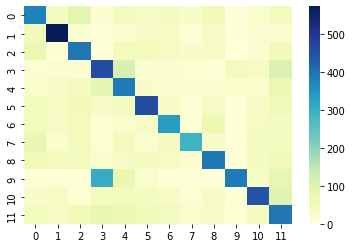

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Visualizing confusion matrix for sample pb test-data predictions using gmm
sns.heatmap(confusion_matrix(pb_actual, pb_pred), cmap="YlGnBu")
print('accuracy score:', accuracy_score(pb_actual, pb_pred))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sample_yt = X_testyt.sample(n=10000)

# yt Test classification
yt_pred = []
yt_actual = sample_yt['39']

pred_gmm(yt_pred, sample_yt.drop(columns=['39']))

accuracy score: 0.0843


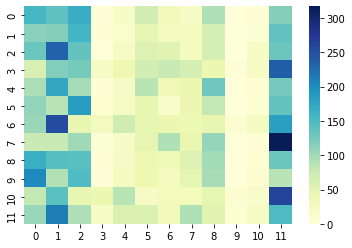

In [ ]:
# Visualizing confusion matrix for sample yt test-data predictions using gmm
sns.heatmap(confusion_matrix(yt_actual, yt_pred), cmap="YlGnBu")
print('accuracy score:', accuracy_score(yt_actual, yt_pred))

In [ ]:
# performance wrt different values of n_components

n_c = [2, 5, 7, 10, 15, 25, 50, 75, 100]
ac = []

for i in n_c:
  # language classes
  classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
  # Create GMM for every language class
  for lang in classes:
      gmm = GaussianMixture(n_components=i, verbose=True)
      X = X_train[X_train['39']==lang]
      gmm.fit(X.drop(columns=['39']))
      
      joblib.dump(gmm, f'gmm_{str(lang)}.smn')

  # Classification on test data
  # load gmm models
  gmm0 = joblib.load('gmm_0.smn')
  gmm1 = joblib.load('gmm_1.smn')
  gmm2 = joblib.load('gmm_2.smn')
  gmm3 = joblib.load('gmm_3.smn')
  gmm4 = joblib.load('gmm_4.smn')
  gmm5 = joblib.load('gmm_5.smn')
  gmm6 = joblib.load('gmm_6.smn')
  gmm7 = joblib.load('gmm_7.smn')
  gmm8 = joblib.load('gmm_8.smn')
  gmm9 = joblib.load('gmm_9.smn')
  gmm10 = joblib.load('gmm_10.smn')
  gmm11 = joblib.load('gmm_11.smn')

  sample_pb = X_testpb.sample(n=10000)

  # PB Test classification
  pb_pred = []
  pb_actual = sample_pb['39']

  pred_gmm(pb_pred, sample_pb.drop(columns=['39']))

  print('n:', i, 'accuracy score:', accuracy_score(pb_actual, pb_pred))
  ac.append(accuracy_score(pb_actual, pb_pred))

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
Initialization converged: True
Initialization 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
Initialization conve

[0.4888, 0.5024, 0.5214, 0.5012, 0.4931, 0.4594, 0.3966, 0.3518, 0.2849]


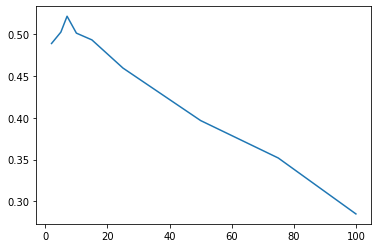

In [ ]:
print(ac)
plt.plot(n_c, ac)

In [ ]:
# Building the model with half covariance matrix

# language classes
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# Create GMM for every language class
for lang in classes:
    gmm = GaussianMixture(n_components=12, covariance_type='diag',verbose=True)
    X = X_train[X_train['39']==lang]
    gmm.fit(X.drop(columns=['39']))
    
    joblib.dump(gmm, f'gmm_{str(lang)}.smn')

Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
Initialization converged: True
Initialization 0
  Iteration 10
  Iteration 20
  Iterat

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sample_pb = X_testpb.sample(n=10000)

# PB Test classification
pb_pred = []
pb_actual = sample_pb['39']

pred_gmm(pb_pred, sample_pb.drop(columns=['39']))

accuracy score: 0.2737


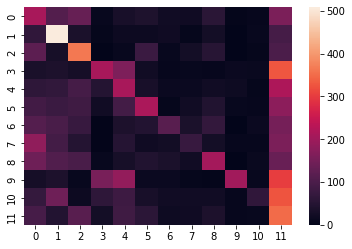

In [ ]:
# Visualizing confusion matrix for sample pb test-data predictions using gmm
sns.heatmap(confusion_matrix(pb_actual, pb_pred))
print('accuracy score:', accuracy_score(pb_actual, pb_pred))